In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
marcusan = pd.read_csv('marketing_customer_analysis.csv')

In [2]:
cols=[]
for c in marcusan.columns:
    cols.append(c.lower())
marcusan.columns=cols

marcusan = marcusan.drop(['unnamed: 0'], axis=1)
marcusan.head()

customer       state  customer lifetime value response  coverage education  \
0  DK49336     Arizona              4809.216960       No     Basic   College   
1  KX64629  California              2228.525238       No     Basic   College   
2  LZ68649  Washington             14947.917300       No     Basic  Bachelor   
3  XL78013      Oregon             22332.439460      Yes  Extended   College   
4  QA50777      Oregon              9025.067525       No   Premium  Bachelor   

  effective to date employmentstatus gender  income  ...  \
0           2/18/11         Employed      M   48029  ...   
1           1/18/11       Unemployed      F       0  ...   
2           2/10/11         Employed      M   22139  ...   
3           1/11/11         Employed      M   49078  ...   
4           1/17/11    Medical Leave      F   23675  ...   

  number of open complaints number of policies     policy type        policy  \
0                       0.0                  9  Corporate Auto  Corporate L3   
1                       0.0                  1   Personal Auto   Personal L3   
2                       0.0                  2   Personal Auto   Personal L3   
3                       0.0                  2  Corporate Auto  Corporate L3   
4                       NaN                  7   Personal Auto   Personal L2   

   renew offer type  sales channel  total claim amount  vehicle class  \
0            Offer3          Agent          292.800000  Four-Door Car   
1            Offer4    Call Center          744.924331  Four-Door Car   
2            Offer3    Call Center          480.000000            SUV   
3            Offer2         Branch          484.013411  Four-Door Car   
4            Offer1         Branch          707.925645  Four-Door Car   

  vehicle size vehicle type  
0      Medsize          NaN  
1      Medsize          NaN  
2      Medsize            A  
3      Medsize            A  
4      Medsize          NaN  

[5 rows x 25 columns]

In [3]:
marcusan.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [4]:
marcusan.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [5]:
numerical = marcusan.select_dtypes(include=np.number)
numerical.head()

customer lifetime value  income  monthly premium auto  \
0              4809.216960   48029                    61   
1              2228.525238       0                    64   
2             14947.917300   22139                   100   
3             22332.439460   49078                    97   
4              9025.067525   23675                   117   

   months since last claim  months since policy inception  \
0                      7.0                             52   
1                      3.0                             26   
2                     34.0                             31   
3                     10.0                              3   
4                      NaN                             31   

   number of open complaints  number of policies  total claim amount  
0                        0.0                   9          292.800000  
1                        0.0                   1          744.924331  
2                        0.0                   2          480.000000  
3                        0.0                   2          484.013411  
4                        NaN                   7          707.925645

In [31]:
marcusan._get_numeric_data().isna().sum()

customer lifetime value          0
income                           0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
total claim amount               0
dtype: int64

In [29]:
mean_numer_of_open_complaints = np.mean(marcusan['months since last claim'])
marcusan['months since last claim'] = marcusan['months since last claim'].fillna(mean_numer_of_open_complaints)

In [30]:
mean_months_since_last_claim = np.mean(marcusan['number of open complaints'])
marcusan['number of open complaints'] = marcusan['number of open complaints'].fillna(mean_months_since_last_claim)

In [6]:
categorical = marcusan.select_dtypes(include=np.object)
categorical.head()

<ipython-input-6-2d4c1aa267db>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = marcusan.select_dtypes(include=np.object)


customer       state response  coverage education effective to date  \
0  DK49336     Arizona       No     Basic   College           2/18/11   
1  KX64629  California       No     Basic   College           1/18/11   
2  LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3  XL78013      Oregon      Yes  Extended   College           1/11/11   
4  QA50777      Oregon       No   Premium  Bachelor           1/17/11   

  employmentstatus gender location code marital status     policy type  \
0         Employed      M      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      M      Suburban         Single   Personal Auto   
3         Employed      M      Suburban         Single  Corporate Auto   
4    Medical Leave      F      Suburban        Married   Personal Auto   

         policy renew offer type sales channel  vehicle class vehicle size  \
0  Corporate L3           Offer3         Agent  Four-Door Car      Medsize   
1   Personal L3           Offer4   Call Center  Four-Door Car      Medsize   
2   Personal L3           Offer3   Call Center            SUV      Medsize   
3  Corporate L3           Offer2        Branch  Four-Door Car      Medsize   
4   Personal L2           Offer1        Branch  Four-Door Car      Medsize   

  vehicle type  
0          NaN  
1          NaN  
2            A  
3            A  
4          NaN

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

In [32]:
y = marcusan['total claim amount']
X = marcusan[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','number of open complaints','number of policies']]

model = lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

69.67271404487718
[-5.47147866e-04 -3.34565440e-03  5.37655659e+00 -2.71542028e-02
 -1.12593352e-01 -8.54184320e-01  8.95377786e-02]


In [53]:
print(lm.score(X,y))

0.5205186782603021


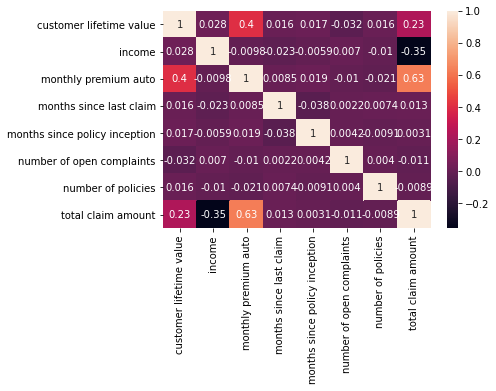

<Figure size 1296x936 with 0 Axes>

In [36]:
correlations_matrix = marcusan.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.figure(figsize=(18, 13))
plt.show()

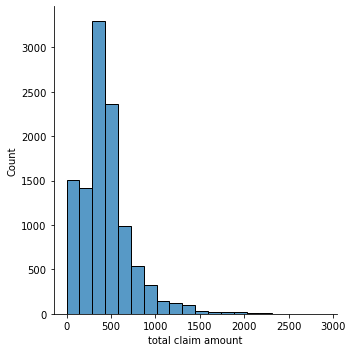

In [41]:
sns.displot(marcusan['total claim amount'], bins=20)
plt.show()

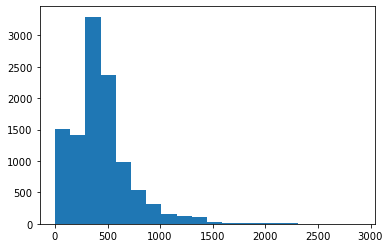

In [40]:
x = marcusan['total claim amount']
plt.hist(x, bins=20)
plt.show()

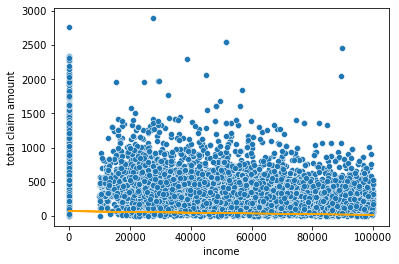

In [46]:
regression_line = lm.intercept_ + lm.coef_[0]*marcusan['income']
plt.plot(marcusan['income'], regression_line, c = 'orange')
sns.scatterplot(x='income',y='total claim amount',data=marcusan)
plt.show()

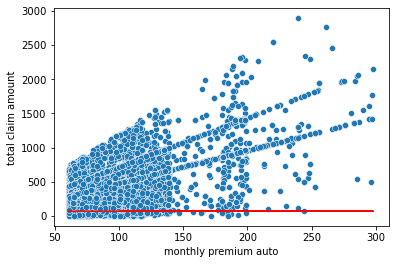

In [47]:
regression_line = lm.intercept_ + lm.coef_[0]*marcusan['monthly premium auto']
plt.plot(marcusan['monthly premium auto'], regression_line, c = 'red')
sns.scatterplot(x='monthly premium auto',y='total claim amount',data=marcusan)
plt.show()

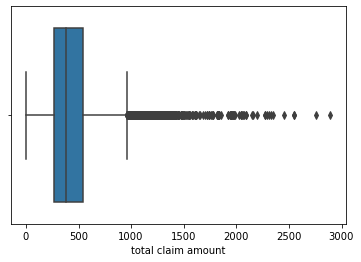

In [48]:
sns.boxplot(x=marcusan['total claim amount'])
plt.show()

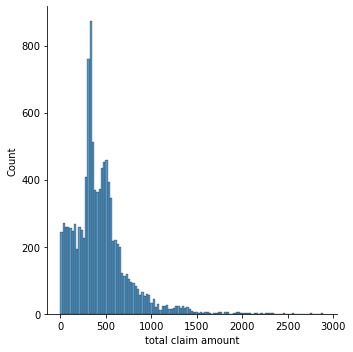

In [49]:
sns.displot(x=marcusan['total claim amount'])
plt.show()

In [50]:
iqr = np.percentile(marcusan['total claim amount'],75) - np.percentile(marcusan['total claim amount'],25)
upper_limit = np.percentile(marcusan['total claim amount'],75) + 1.5*iqr
lower_limit = np.percentile(marcusan['total claim amount'],25) - 1.5*iqr

In [51]:
lower_limit

-143.09368312500004

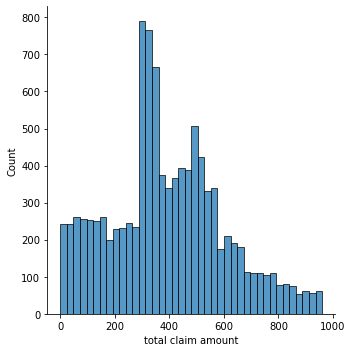

In [52]:
marcusan = marcusan[(marcusan['total claim amount']>lower_limit) & (marcusan['total claim amount']<upper_limit)]
sns.displot(marcusan['total claim amount'])
plt.show()


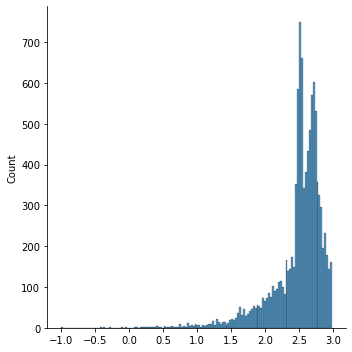

In [55]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

total_claim_amount_log = list(map(log_transfom_clean1, marcusan['total claim amount']))
sns.displot(total_claim_amount_log)
plt.show()

<ipython-input-56-1918d08322cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcusan['total_claim_amount_log'] = list(map(log_transfom_clean2, marcusan['total claim amount']))
<ipython-input-56-1918d08322cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcusan['total_claim_amount_log'] = marcusan['total_claim_amount_log'].fillna(np.mean(marcusan['total_claim_amount_log']))


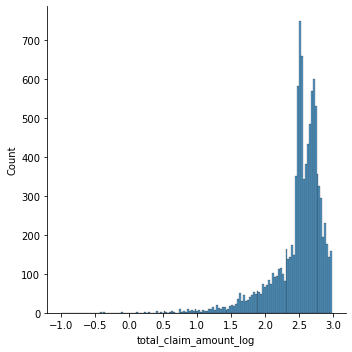

In [56]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
marcusan['total_claim_amount_log'] = list(map(log_transfom_clean2, marcusan['total claim amount']))
marcusan['total_claim_amount_log'] = marcusan['total_claim_amount_log'].fillna(np.mean(marcusan['total_claim_amount_log']))
sns.displot(marcusan['total_claim_amount_log'])
plt.show()

In [58]:
marcusan.head()

customer       state  customer lifetime value response  coverage education  \
0  DK49336     Arizona              4809.216960       No     Basic   College   
1  KX64629  California              2228.525238       No     Basic   College   
2  LZ68649  Washington             14947.917300       No     Basic  Bachelor   
3  XL78013      Oregon             22332.439460      Yes  Extended   College   
4  QA50777      Oregon              9025.067525       No   Premium  Bachelor   

  effective to date employmentstatus gender  income  ... number of policies  \
0           2/18/11         Employed      M   48029  ...                  9   
1           1/18/11       Unemployed      F       0  ...                  1   
2           2/10/11         Employed      M   22139  ...                  2   
3           1/11/11         Employed      M   49078  ...                  2   
4           1/17/11    Medical Leave      F   23675  ...                  7   

      policy type        policy  renew offer type  sales channel  \
0  Corporate Auto  Corporate L3            Offer3          Agent   
1   Personal Auto   Personal L3            Offer4    Call Center   
2   Personal Auto   Personal L3            Offer3    Call Center   
3  Corporate Auto  Corporate L3            Offer2         Branch   
4   Personal Auto   Personal L2            Offer1         Branch   

   total claim amount  vehicle class vehicle size vehicle type  \
0          292.800000  Four-Door Car      Medsize          NaN   
1          744.924331  Four-Door Car      Medsize          NaN   
2          480.000000            SUV      Medsize            A   
3          484.013411  Four-Door Car      Medsize            A   
4          707.925645  Four-Door Car      Medsize          NaN   

  total_claim_amount_log  
0               2.466571  
1               2.872112  
2               2.681241  
3               2.684857  
4               2.849988  

[5 rows x 26 columns]

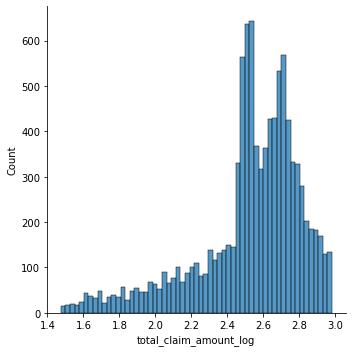

In [59]:
iqr = np.percentile(marcusan['total_claim_amount_log'],75) - np.percentile(marcusan['total_claim_amount_log'],25)
upper_limit = np.percentile(marcusan['total_claim_amount_log'],75) + 3*iqr
lower_limit = np.percentile(marcusan['total_claim_amount_log'],25) - 3*iqr
marcusan = marcusan[(marcusan['total_claim_amount_log']>lower_limit) & (marcusan['total_claim_amount_log']<upper_limit)]
sns.displot(marcusan['total_claim_amount_log'])
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Y = marcusan['total claim amount']
X = marcusan.drop(['total claim amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

<ipython-input-60-064861904755>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object)


In [61]:
X_num

customer lifetime value  income  monthly premium auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10903              2771.663013   59855                    74   
10904             19228.463620       0                   187   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   

       months since last claim  months since policy inception  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.149071                             31   
...                        ...                            ...   
10903                30.000000                             82   
10904                14.000000                             32   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   

       number of open complaints  number of policies  total_claim_amount_log  
0                       0.000000                   9                2.466571  
1                       0.000000                   1                2.872112  
2                       0.000000                   2                2.681241  
3                       0.000000                   2                2.684857  
4                       0.384256                   7                2.849988  
...                          ...                 ...                     ...  
10903                   4.000000                   1                2.550473  
10904                   0.000000                   2                2.953083  
10906                   0.000000                   6                2.436193  
10907                   0.000000                   2                2.581275  
10908                   4.000000                   6                2.791191  

[10078 rows x 8 columns]

In [62]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)

(10078, 8)


customer lifetime value    income  monthly premium auto  \
0                     0.044103  0.480381              0.000000   
1                     0.005007  0.000000              0.012766   
2                     0.197698  0.221432              0.165957   
3                     0.309569  0.490873              0.153191   
4                     0.107971  0.236795              0.238298   
...                        ...       ...                   ...   
10073                 0.013235  0.598664              0.055319   
10074                 0.262546  0.000000              0.536170   
10075                 0.050924  0.611576              0.017021   
10076                 0.333215  0.398446              0.595745   
10077                 0.152614  0.642072              0.412766   

       months since last claim  months since policy inception  \
0                     0.200000                       0.525253   
1                     0.085714                       0.262626   
2                     0.971429                       0.313131   
3                     0.285714                       0.030303   
4                     0.432831                       0.313131   
...                        ...                            ...   
10073                 0.857143                       0.828283   
10074                 0.400000                       0.323232   
10075                 0.200000                       0.686869   
10076                 0.314286                       0.636364   
10077                 0.000000                       0.272727   

       number of open complaints  number of policies  total_claim_amount_log  
0                       0.000000               1.000                0.657919  
1                       0.000000               0.000                0.926901  
2                       0.000000               0.125                0.800302  
3                       0.000000               0.125                0.802701  
4                       0.076851               0.750                0.912226  
...                          ...                 ...                     ...  
10073                   0.800000               0.000                0.713568  
10074                   0.000000               0.125                0.980606  
10075                   0.000000               0.625                0.637770  
10076                   0.000000               0.125                0.733998  
10077                   0.800000               0.625                0.873229  

[10078 rows x 8 columns]